<a href="https://colab.research.google.com/github/Michell203/DingLab/blob/main/DLabCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip3 install scanpy

In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import scipy
import matplotlib.pyplot as plt

import math
import random
from random import randrange
import itertools

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split, Subset

from google.colab import drive
# from scipy.special import softmax

# https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html - Scanpy preprocess
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_h5ad.html - Scanpy h5ad
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.read_10x_h5.html - Scanpy 10x h5
# https://scanpy.readthedocs.io/en/stable/index.html - Scanpy webpage

# https://www.partek.com/webinar/understanding-data-formats-and-preprocessing/
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Preprocess
Get a sense of the data (GSM4504959_E12.5_filtered_gene_bc_matrices.h5)

Cell count: 9792,
Gene count: 27998

In [ ]:
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1.var_names_make_unique()
# print(t1.X)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


  (0, 27920)	39.0
  (0, 27917)	13.0
  (0, 27914)	38.0
  (0, 27913)	36.0
  (0, 27911)	26.0
  (0, 27910)	7.0
  (0, 27909)	2.0
  (0, 27908)	28.0
  (0, 27903)	1.0
  (0, 27901)	1.0
  (0, 27898)	4.0
  (0, 27893)	3.0
  (0, 27886)	1.0
  (0, 27840)	1.0
  (0, 27837)	4.0
  (0, 27829)	1.0
  (0, 27827)	3.0
  (0, 27817)	9.0
  (0, 27804)	2.0
  (0, 27792)	1.0
  (0, 27787)	2.0
  (0, 27771)	5.0
  (0, 27766)	1.0
  (0, 27745)	2.0
  (0, 27739)	1.0
  :	:
  (9791, 532)	1.0
  (9791, 501)	11.0
  (9791, 499)	5.0
  (9791, 458)	1.0
  (9791, 443)	1.0
  (9791, 422)	1.0
  (9791, 417)	1.0
  (9791, 390)	1.0
  (9791, 377)	1.0
  (9791, 368)	4.0
  (9791, 341)	1.0
  (9791, 340)	1.0
  (9791, 329)	1.0
  (9791, 285)	2.0
  (9791, 236)	1.0
  (9791, 227)	4.0
  (9791, 208)	1.0
  (9791, 188)	1.0
  (9791, 130)	1.0
  (9791, 95)	1.0
  (9791, 68)	1.0
  (9791, 62)	7.0
  (9791, 51)	1.0
  (9791, 45)	2.0
  (9791, 37)	1.0


In [ ]:
array = t1.X.toarray()
number = 0
for i in range(9791):
  number += array[i,27997]
mean_of_gene1 = number/9791
# print(mean_of_gene1)

0.0013277499744663466


In [ ]:
t1.X

<9792x27998 sparse matrix of type '<class 'numpy.float32'>'
	with 25041018 stored elements in Compressed Sparse Row format>

In [ ]:
# sc.pp.normalize_total(t1, target_sum=1e4)

In [ ]:
pseudobulk_h5_file_1 = t1.X.mean(axis=0)
# print(pseudobulk_h5_file_1)

[[0.00113179 0.         0.         ... 0.10274449 0.000142   0.00174793]]


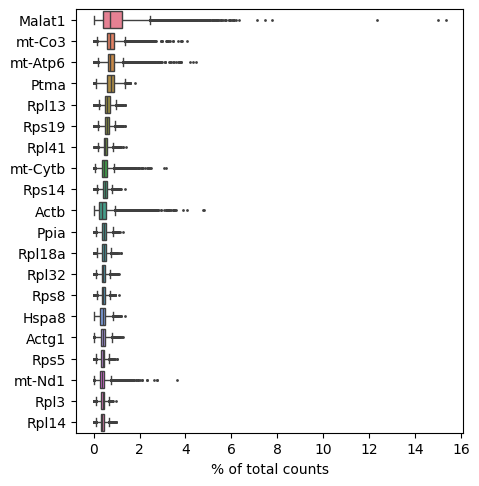

None


In [ ]:
# print(sc.pl.highest_expr_genes(t1, n_top=20, ))

In [ ]:
# sc.pp.normalize_total(t1, target_sum=1e4)
# sc.pp.log1p(t1)

In [ ]:
pseudobulk_t1 = t1.X.mean(axis=0)
# print(pseudobulk_t1)

[[0.00113179 0.         0.         ... 0.10274448 0.000142   0.00174793]]


In [ ]:
# Generate new information about counts
t1.var_names_make_unique()
sc.pp.calculate_qc_metrics(t1, log1p=False, inplace=True)

frame1_obs = pd.DataFrame(t1.obs)
frame1_obs.drop(['pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'], axis=1)

frame1_vars = pd.DataFrame(t1.var)

In [ ]:
# t1.layers["t1.X"] = t1.X
# t1.to_df(layer="t1.X")

,Xkr4,Gm1992,Gm37381,Rp1,Rp1-1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
AAACCTGAGAACTGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGACCCACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.8082,0.0,0.0,0.0
AAACCTGAGACTAGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.686006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
AAACCTGAGCCGATTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.892864,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGCTGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTCTTGATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCAGTTGCGCAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
TTTGTCATCATGCATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.098853,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


# Create Pseudobulk

In [7]:
t0 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504959_E12.5_filtered_gene_bc_matrices.h5")
t1 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504960_E15.5_filtered_gene_bc_matrices.h5")
t2 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504961_E17.5_filtered_gene_bc_matrices.h5")
t3 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504962_P3_filtered_gene_bc_matrices.h5")
t4 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504963_P7_filtered_gene_bc_matrices.h5")
t5 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504964_P15_filtered_gene_bc_matrices.h5")
t6 = sc.read_10x_h5("/content/drive/MyDrive/Ding Lab/Data/GSM4504965_P42_filtered_gene_bc_matrices.h5")

sc.pp.normalize_total(t0, target_sum=1e4)
sc.pp.normalize_total(t1, target_sum=1e4)
sc.pp.normalize_total(t2, target_sum=1e4)
sc.pp.normalize_total(t3, target_sum=1e4)
sc.pp.normalize_total(t4, target_sum=1e4)
sc.pp.normalize_total(t5, target_sum=1e4)
sc.pp.normalize_total(t6, target_sum=1e4)

h5_files = [t0, t1, t2, t3, t4, t5, t6]
pseudo_bulks = []

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_name

In [8]:
t0.var_names
max_value = t0.X.max()
# print(max_value)

In [9]:
def pseudo_bulk(h5_file): # Creates pseudobulk of h5 file
  sc.pp.normalize_total(h5_file, target_sum=1e4)
  pseudobulk_h5_file = h5_file.X.mean(axis=0)

  values = []
  for i in range(pseudobulk_h5_file.shape[1]):
    values.append(pseudobulk_h5_file[0,i])

  return np.array(values)

In [10]:
def create_pseudo_bulk(h5_files): # Generates pseudobulk from all time-stamps
  pseudo_bulks = []
  for h5_file in h5_files:
    pseudo_h5 = pseudo_bulk(h5_file)
    pseudo_bulks.append(pseudo_h5)

  return np.array(pseudo_bulks)

In [11]:
obs_names = {} # For .obs of bulk AnnData object
for i in range(len(h5_files)): # 7
  obs_names[i] = "TimeStamp" + str(i)
obs_frame = pd.DataFrame(list(obs_names.items()), columns=['Index', 'TimeStamp'])
# print(obs_frame)

In [12]:
bulks = create_pseudo_bulk(h5_files)
bulks_adata = ad.AnnData(bulks, obs=obs_frame, var=t0.var)

/usr/local/lib/python3.10/dist-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [13]:
# print(bulks_adata.X)
# print(bulks_adata.obs)
# print(bulks_adata.var)

In [14]:
bulks_adata.obs['files'] = ['GSM4504959_E12.5_filtered_gene_bc_matrices.h5', 'GSM4504960_E15.5_filtered_gene_bc_matrices.h5',
                            'GSM4504961_E17.5_filtered_gene_bc_matrices.h5', 'GSM4504962_P3_filtered_gene_bc_matrices.h5',
                            'GSM4504963_P7_filtered_gene_bc_matrices.h5', 'GSM4504964_P15_filtered_gene_bc_matrices.h5',
                            'GSM4504965_P42_filtered_gene_bc_matrices.h5']

In [15]:
bulks_adata.var['gene_ids']

Xkr4              ENSMUSG00000051951
Gm1992            ENSMUSG00000089699
Gm37381           ENSMUSG00000102343
Rp1               ENSMUSG00000025900
Rp1               ENSMUSG00000109048
                         ...        
AC168977.1        ENSMUSG00000079808
PISD              ENSMUSG00000095041
DHRSX             ENSMUSG00000063897
Vmn2r122          ENSMUSG00000096730
CAAA01147332.1    ENSMUSG00000095742
Name: gene_ids, Length: 27998, dtype: object

In [16]:
bulks_adata.obs['files']

0    GSM4504959_E12.5_filtered_gene_bc_matrices.h5
1    GSM4504960_E15.5_filtered_gene_bc_matrices.h5
2    GSM4504961_E17.5_filtered_gene_bc_matrices.h5
3       GSM4504962_P3_filtered_gene_bc_matrices.h5
4       GSM4504963_P7_filtered_gene_bc_matrices.h5
5      GSM4504964_P15_filtered_gene_bc_matrices.h5
6      GSM4504965_P42_filtered_gene_bc_matrices.h5
Name: files, dtype: object

In [17]:
def pick_gene(gene_no, gene_database=bulks_adata):
  return gene_database.X[:, gene_no]

In [18]:
# Look at time series patterns of a selected gene
gene_timeseries = pick_gene(0)
def plot_geneseries(gene):
  length = [x for x in range(len(gene))]
  plt.plot(length, gene)
  plt.xlabel('Time')
  plt.ylabel('Gene Expression')

# plot_geneseries(gene_timeseries)

# Model

### KNN Function
Find neighboring genes

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [19]:
k = 50
k += 1
neighbors = NearestNeighbors(n_neighbors=k) # k = x, x-1 neighbors
neighbors.fit(bulks_adata.X.T)

def find_neighbors(g, neighbors_func=neighbors, gene_database=bulks_adata):
  neighbor_arr = neighbors_func.kneighbors([g])
  return neighbor_arr[1][0][1:]

In [20]:
# Check, do the time series looks similar?
# gene_0 = pick_gene(0)
# gene0_neighbors = find_neighbors(gene_0)
# plot_geneseries(pick_gene(gene0_neighbors[1]))

### Data Preprocessing

In [21]:
# Format input for NN
def format_input(g, gene_database=bulks_adata): # Shape input to our desired format: [g1,...,gt,n1,...,nt,1,2,...,t]
  """
    format_input formats the input for the NN

    :param g: Gene expression values for single gene g
    :param gene_database: Database to pull gene expressions from

    :return: Formatted input, with genes and neighbors as features
  """
  neighbors = find_neighbors(g, gene_database=gene_database) # Get indices of all neighbors of g
  input = np.array(g)

  for n in neighbors:
    neighbor_gene = np.array(pick_gene(n))
    input = np.concatenate((input, neighbor_gene), axis=None) # Concat neighbors with original gene

  return input

# gene0 = format_input(pick_gene(0))

In [22]:
# Do multiple dimensions. For later

# def pos_enc(max_TS, d_model=1, n=1000.0): # Taken from https://nlp.seas.harvard.edu/2018/04/03/attention.html#positional-encoding
#   pe = torch.zeros(max_TS, d_model)

#   position = torch.arange(0, max_TS).unsqueeze(1)
#   div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(n) / d_model))

#   pe[:, 0::2] = torch.sin(position * div_term)
#   pe[:, 1::2] = torch.cos(position * div_term)

#   pe = pe.unsqueeze(0)
#   pe = pe.flatten()

#   return pe

# print(pos_enc(7))

In [23]:
all_inputs = [] # All inputs, formatted, not scaled
# int_time_embeddings = [x for x in range(bulks_adata.obs.shape[0])] # Time embeddings for each gene
# time_embeddings = pos_enc(bulks_adata.obs.shape[0])

time_embeddings = [x for x in range(bulks_adata.obs.shape[0])]

# time_embeddings = [x for x in range(bulks_adata.obs.shape[0])] # JUST FOR TESTING

for i in range( int(len(bulks_adata.var)) ):
  # Pick gene and format the input
  gene_i = pick_gene(i)
  formatted_input = format_input(gene_i)

  all_inputs.append(formatted_input)

In [24]:
# Masking mechanism
def mask(time_points, input, mask_value=np.NINF, gene_database=bulks_adata): # Time points start form 0. Time points is of type array
  """
    mask is function to mask inputs

    :param time_points: Array. What time points to mask
    :param input: Input array to be masked
    :param gene_database: Database to pull gene expressions from

    :return: Masked array and masked values separately. Masked array has masked index appended to end.
  """
  new_arr = input.copy()
  max_timepoints = bulks_adata.obs.shape[0]
  masked = []

  first_y = []

  for n in range(len(input)):
    ts_mask = n % max_timepoints

    if ts_mask in time_points: # Mask each time-point for every neighbour
      masked.append(new_arr[n])

      if ts_mask == time_points[0]:
        first_y.append(new_arr[n])

      new_arr[n] = mask_value  # Masked with -inf by default

  # new_arr = np.append(new_arr, time_embeddings[time_points[0]])
  new_arr = np.append(new_arr, time_points[0])

  return new_arr, first_y

# test, masked = mask([2, 1, 3], gene0)
# print(gene0)
# print(test, masked)

In [25]:
# X_train_note, X_test_note = train_test_split(all_inputs, train_size=0.8, shuffle=False) # 80/20 Split all inputs
X_train_note, X_test_note = train_test_split(all_inputs, train_size=0.8, shuffle=True) # 80/20 Split all inputs

In [26]:
# print(X_train_note[200])

In [27]:
scaler = StandardScaler() # Standard scaler for inputs
X_train_note = scaler.fit_transform(X_train_note)
X_test_note = scaler.transform(X_test_note)

In [28]:
all_data = [] # After scaling, append time embeddings
# time_embeddings = [x for x in range(bulks_adata.obs.shape[0])]
for i in range(len(X_train_note)):
  all_data.append( np.append(X_train_note[i], time_embeddings) )

for i in range( len(X_test_note) ):
  all_data.append( np.append(X_test_note[i], time_embeddings) )

In [29]:
X_train = []
X_test = []

for i in range(int(len(all_data) * 0.8)): # 80%, 20% split
  X_train.append( all_data[i] )

for i in range(int(len(all_data) * 0.8)+1, len(all_data)):
  X_test.append( all_data[i] )

In [30]:
# print(X_train[0])

In [31]:
def generate_combintations(n, time_points=time_embeddings):
  """
    generate_combintations generates combinations for masking of time points of length n.
    First element is masked and to be predicted, rest are masked.
    Function generates special kind of permutation where only order of first element matters.

    :param time_points: Max number of time points
    :param n: Length of combination (number of time points to mask)

    :return: List of combinations
  """
  combinations = []
  to_skip = int(math.factorial(n-1))-1 # Want only permutations where first number is different, skip the rest
  skipped = to_skip

  # time_array = [x for x in range(time_points)]

  for comb in itertools.combinations(time_points, n): # Generate combinations of length n
    to_avg = [] # Group together permutations that will be averaged in the end

    for permutation in list(itertools.permutations(comb)): # Generate permutations of those combinations
      if skipped > 0: # Dont want all permutations
        skipped -= 1
        continue

      to_avg.append(list(permutation))

      skipped = to_skip

    combinations.append(to_avg)

    # e.g. combinations[0] has lists of size n. Caluclate MAE for predictions of all of them, take average.

  return combinations
# generate_combintations(3)

In [32]:
def gen_loader(X_train, n):
  '''
  Generate training for Regressor NN
  '''
  X_train_loader = []
  i = 0
  while i < len(X_train)-1:

    for comb in generate_combintations(n):
      loader = []
      for seq in comb:

        if i > len(X_train)-1:
          break

        masked, y = mask(seq, X_train[i])
        masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)
        arr = [masked, y]

        loader.append(arr)

      X_train_loader.append(loader)
      i += 1

  return X_train_loader

In [33]:
# print(len(gen_loader(X_train, 1)))

In [34]:
# print(len(X_train))
# print(len(X_test))

In [35]:
X_train_loader = []
AE_train_loader = []
AE_test_loader = []

for i in range(1, len(time_embeddings)):
  random.shuffle(X_train)
  gen_i = gen_loader(X_train, i)

  X_train_loader.extend( gen_i )

  random.shuffle(gen_i)
  # print(len(gen_i))
  # random_indices = torch.randperm(len(gen_i))
  # random_indices_int = [x.item() for x in random_indices]
  # gen_i = gen_i[random_indices_int]

  for j in gen_i[:len(gen_i)//2]:
    AE_train_loader.extend( j )

  random.shuffle(X_test)
  gen_i_test = gen_loader(X_test, i)
  random.shuffle(gen_i_test)

  for t in gen_i_test:
    AE_test_loader.extend( t )

random.shuffle(X_train_loader)
random.shuffle(AE_train_loader)

In [36]:
# print(len(X_train_loader))
# print(len(AE_train_loader))
# print(X_train_loader[1001])

In [37]:
# for batch in AE_train_loader:
#   print(batch)
#   break
# print(AE_train_loader[0])
# print(AE_train_loader[3])

In [38]:
# X_test_loader = []

# X_test_loader1 = gen_loader(X_test, 1)[0]
# X_test_loader1 = gen_loader(X_test, 2)[0]
# X_test_loader1 = gen_loader(X_test, 3)[0]
# X_test_loader1 = gen_loader(X_test, 4)[0]
# X_test_loader1 = gen_loader(X_test, 5)[0]
# X_test_loader1 = gen_loader(X_test, 6)[0]

In [39]:
class GeneDatasetAE(torch.utils.data.Dataset):
  # Characterizes a dataset for PyTorch
  def __init__(self, X):
        # self.genes = genes
        self.X = X
        # self.X = torch.tensor(X, dtype=torch.float32)
        # self.y = y.detach().clone()

  def __len__(self):
        return len(self.X)

  def __getitem__(self, index):
        # Generates one sample of data
        gene = self.X[index]

        return gene

In [40]:
AEgeneTrainSet = GeneDatasetAE(AE_train_loader)
AE_train_loader_x = DataLoader(AEgeneTrainSet, shuffle=True, batch_size=3)

AEgeneTestSet = GeneDatasetAE(AE_train_loader)
AE_test_loader_X = DataLoader(AEgeneTestSet, shuffle=True, batch_size=3)

# RGgeneTrainSet = GeneDatasetAE(X_train_loader)
# RG_train_loader_x = DataLoader(RGgeneTrainSet, shuffle=True, batch_size=3)

# RGgeneTestSet = GeneDatasetAE(AE_train_loader)
# RG_test_loader_X = DataLoader(RGgeneTestSet, shuffle=True, batch_size=3)

In [41]:
# AEgeneTrainSet.__getitem__(0)

In [42]:
# for batch, _ in AE_train_loader_x:
#   print(batch)
#   break

### AutoEncoder + NN

In [43]:
class HybridNN(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, output_size),
        )

        self.decoder = nn.Sequential(
            nn.Linear(output_size, 128),
            nn.ReLU(),
            nn.Linear(128, input_size),
        )

        self.regressor = nn.Sequential(
            nn.Linear(output_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        # AutoEncoder
        z = self.encoder(x)
        decoded = self.decoder(z)

        # Regressor NN
        regression = self.regressor(z)

        return decoded, regression

In [44]:
def custom_loss(y_pred, y, loss_fn):
  '''
  Skip over masked values in the calculation. This is done for AE phase
  '''
  # mask = ~torch.isnan(y) # True if not nan

  mask = ~torch.isinf(y) # True if not infinity
  return loss_fn(y_pred[mask], y[mask])

In [45]:
def random_mask(input, seed=random.random()):
  '''
  input: Tensor
  Randomly mask -inf values in the input. Each masked index is different.
  '''
  new_arr = input.detach().clone()
  random.seed(seed)

  if len(input.shape) > 1:
    for i in new_arr:
      for j in range(len(i)):
        if torch.isinf(i[j]):
          rand_num = random.uniform(-1, 1) # Generate number between -1 and 1
          i[j] = rand_num

  else:
    for i in range(len(new_arr)):
      if torch.isinf(new_arr[i]):
        rand_num = random.uniform(-1, 1) # Generate number between -1 and 1
        new_arr[i] = rand_num

  # rand_num = random.uniform(-1, 1) # Generate number between -1 and 1
  # masked_X = torch.nan_to_num(new_arr, neginf=rand_num)
  return new_arr

random_test = random_mask(torch.tensor([0, np.NINF, 2, np.NINF, 4, 5, 6]), -0.1)
# print(random_test)

# Same random value for each masked time point? no
# How many times to retrain on same input? doesnt matter
# What do I mask with when testing? avg value, 0, random value

In [46]:
dim_reduction_size = 64
hybrid_model = HybridNN((k+1) * len(time_embeddings) + 1, dim_reduction_size)

loss_MSE = nn.MSELoss() # For AutoEncoder
loss_MAE = nn.L1Loss(reduction='none') # For Regressor

# Stage 1: AE
optimizer_enc = optim.Adam(hybrid_model.encoder.parameters(), lr=0.001, weight_decay=0.0001)
optimizer_dec = optim.Adam(hybrid_model.decoder.parameters(), lr=0.001, weight_decay=0.0001)

# Stage 2: Regressor
optimizer_reg = optim.SGD(hybrid_model.regressor.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer_reg, gamma=0.9)

# Stage 3: Both
optimizer_both = optim.SGD(hybrid_model.parameters(), lr=0.00001, momentum=0.9)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer_both, gamma=0.9)

optimizers = [optimizer_enc, optimizer_dec, optimizer_reg, optimizer_both]

# Decrease learning rate when training regressor with optim.param_groups[0]['lr'] *= 1e-2

In [ ]:
def train_hybridNN(hyb_model, loader1, loader2, optimizers, loss_fn1, loss_fn2, custom_loss, epochs):
  '''
  Train model in 3 phases:
    1. AutoEncoder
    2. Regressor
    3. Both

    Learning rate is decreased in phase 3
  '''
  optimizer_enc, optimizer_dec, optimizer_reg, optimizer_both = optimizers

  epoch_vals = []
  loss_vals = []

  print("AutoEncoder:")

  # -------- Stage 1 --------
  # AutoEncoder Part:
  for epoch in range(epochs):
    hyb_model.train()
    last_loss = 0

    for i in range(3):
      print(i)
      for AE_input, _ in loader1:
        # masked_X = torch.nan_to_num(AE_input, nan=0.0, neginf=0.0) # Make all -inf to 0 for forward pass
        masked_X = random_mask(AE_input, random.random())
        reconstructed, _ = hyb_model(masked_X)

        loss = custom_loss(reconstructed, AE_input, loss_fn1) # Calculate MSE only for non-masked values

        optimizer_enc.zero_grad()
        optimizer_dec.zero_grad()

        loss.backward()

        clipping_value = 1
        torch.nn.utils.clip_grad_norm_(hyb_model.parameters(), clipping_value)

        optimizer_enc.step()
        optimizer_dec.step()

        last_loss = loss.item()

    print(f'Epoch {epoch}: Loss = {last_loss}')

  print()
  print("Regressor:")

  # optimizer.param_groups[0]['lr'] *= 1e-2 # Decrease learning rate. This is to make sure AE does not change significantly in phase 2

  # -------- Stage 2 --------
  for epoch in range(epochs):
    hyb_model.train()

    # Freeze AE
    for name, param in hybrid_model.named_parameters():
      if "encoder" in name or "decoder" in name:
        param.requires_grad = False

    last_loss = 0

    # Regressor Part:

    # Train multiple times on same input, different masked values
    # random_seed = random.random() # Random seed to ensure same random values for the batch

    for batch in loader2:
      if batch == []:
        continue

      for i in range(3):
        # print(i)
        avg_loss = 0
        # optimizer.zero_grad()
        optimizer_reg.zero_grad()

        for x, y in batch:
          masked_X = random_mask(x)

        # masked_X = torch.nan_to_num(x, nan=0.0, neginf=0.0)
          _, y_pred = hyb_model(masked_X)

          loss = loss_fn2(y_pred, y)
          avg_loss += loss/len(batch)

        avg_loss.backward()

    # optimizer.step()
      optimizer_reg.step()
      last_loss = avg_loss.item()

    scheduler.step()
    print(f'Epoch {epoch}: Loss = {last_loss}')

  print()
  print("Both:")

  # -------- Stage 3 --------
  for epoch in range(epochs):
    hyb_model.train()

    # Unfreeze AE
    for name, param in hybrid_model.named_parameters():
      if "encoder" in name or "decoder" in name:
        param.requires_grad = True

    for i in range(2):
      print(i)
      random_seed = random.random() # Random seed to ensure same random values for the batch

      for batch in loader2:
        if batch == []:
          continue

        avg_loss_reg = 0
        avg_loss_ae = 0
        # optimizer.zero_grad()
        optimizer_both.zero_grad()

        for x, y in batch:
          # masked_X = torch.nan_to_num(x, nan=0.0, neginf=0.0)
          masked_X = random_mask(masked_X, random_seed)
          reconstruction, y_pred = hyb_model(masked_X)

          loss_reg = loss_fn2(y_pred, y)
          avg_loss_reg += loss_reg/len(batch)

          loss_ae = custom_loss(reconstruction, x, loss_fn1)
          avg_loss_ae += loss_ae/len(batch)

        combined_loss = avg_loss_reg + avg_loss_ae
        combined_loss.backward()

        # optimizer.step()
        optimizer_both.step()
        last_loss = avg_loss.item()

      scheduler.step()

    print(f'Epoch {epoch}: Loss = {last_loss}')

#train_hybridNN(hybrid_model, AE_train_loader_x, X_train_loader, optimizers, loss_MSE, loss_MAE, custom_loss, epochs=1)

In [ ]:
#torch.save(hybrid_model.state_dict(), "hybrid_modelv16_50nto64.pth")

In [47]:
hybrid_model = HybridNN((k+1) * len(time_embeddings) + 1, 64)
hybrid_model.load_state_dict(torch.load("/content/hybrid_modelv14_50nto64.pth"))

<All keys matched successfully>

In [48]:
# Test Hybrid model
# AutoEnoder:
hybrid_model.eval()
y_pred = []
loss = 0
loss_nonmasked = 0

for x in AE_test_loader:
  zero_X = torch.nan_to_num(x[0], nan=0.0, neginf=0.0)
  y_pred, _ = hybrid_model(zero_X)

  loss += loss_MSE(y_pred, zero_X)
  loss_nonmasked += custom_loss(y_pred, x[0], loss_MSE)

loss = loss/len(AE_test_loader)
loss_nonmasked = loss_nonmasked/len(AE_test_loader)
print(f'Test Loss: {loss.item()}')
print(f'Test Loss (nonmasked): {loss_nonmasked.item()}')

# Regressor

Test Loss: 0.3283151686191559
Test Loss (nonmasked): 0.130282923579216


## Measuring Performance
For each gene, measure avg accuracy, correlation, MAE, MSE

In [49]:
def MAE(pred, y):
  return abs(pred-y)

def MSE(pred, y):
  return (pred-y)**2

def RMSE(pred, y):
  return torch.sqrt(MSE(pred, y))

In [50]:
def avg_mask(input, time_points=len(bulks_adata.obs)):
  '''
  input: Tensor
  Mask -inf values in the input. Masked value of t is average value of t-1 and t+1
  '''
  tensor_list = input.tolist()
  for i in range(k+1):
    neighbor_i = tensor_list[i*7 : (i*7)+7] # Split input to individal neighbors for easier calculation

    for n in range(len(neighbor_i)):
      if neighbor_i[n] == np.NINF:
        left_real = None
        right_real = None

        # Search left
        for j in range(n - 1, -1, -1):
            if neighbor_i[j] != np.NINF:
                left_real = neighbor_i[j]
                break

        # Search right
        for j in range(n + 1, len(neighbor_i)):
            if neighbor_i[j] != np.NINF:
                right_real = neighbor_i[j]
                break

        if left_real is not None and right_real is not None: # Replace with avg value for consecutive np.NINF
          avg_val = (left_real + right_real) / 2
          neighbor_i[n] = avg_val

          for t in range(n+1, len(neighbor_i)):
            if neighbor_i[t] == np.NINF:
              neighbor_i[t] = avg_val
            else:
              break

        elif left_real is not None:
          neighbor_i[n] = left_real

        elif right_real is not None:
          neighbor_i[n] = right_real

        tensor_list[i*7 : (i*7)+7] = neighbor_i

    # Convert the list back to a tensor
  return torch.tensor(tensor_list)

# test_tens = torch.tensor([np.NINF, 1, 2, np.NINF, np.NINF, 5, 6, 7, 8, 9, np.NINF, np.NINF, 12, np.NINF])
# test_gene = all_data[5]
# masked_g, _ = mask([0,2], test_gene)
# masked_g = torch.tensor(masked_g, dtype=torch.float32)
# print(masked_g)
# avg_test = avg_mask(masked_g)
# print(avg_test)

###### Metrics for combinations of masked time points

In [51]:
def metric_combinationTS(gene_no, metric_func, n, database=all_data, model=hybrid_model, time_points=time_embeddings, encoded=False, printB=False):
  """
    metric_combinationTS calculate performance metric for prediction of combinations hidden time points for single gene in database

    :param time_points: How many time points to measure
    :param metric_func: Metric function to measure performance (MAE is preferred)
    :param n: Length of combinations

    :return: Average value of metric for each hidden time point for all genes, also prints lowest value
  """

  model.eval()
  gene = database[gene_no]
  max_TS = int(gene[-1])+1

  combinations = generate_combintations(n)

  metric_values = []
  # all_avg_vals = []

  with torch.no_grad():
    for comb in combinations: # Sequence of combinations to average
      combintation_sum = 0 # Sum absolute error of all combinations, then divide by n
      seed = random.random()

      for sequence in comb: # Calculate MAE for each sequence, average them
        masked, y = mask(sequence, gene)
        masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

        # encoded_x = masked

        # if encoded:
        #   with torch.no_grad():
        #     zeros_X = torch.nan_to_num(masked, nan=0.0, neginf=-1.0) # Make all -inf to -1 for passing into encoder
        #     encoded_x = model.encoder(zeros_X)

        # masked = encoded_x

        # prediction = model.regressor(masked) # Get predicted value for time points

        # zeros_X = torch.nan_to_num(masked, nan=0.0, neginf=0.0)
        # zeros_X = random_mask(masked, seed)

        zeros_X = avg_mask(masked)

        # print(zeros_X)
        _, prediction = model(zeros_X)

        metric_measure = metric_func(prediction, y)[0].item() # Measure error using metric_func
        combintation_sum += metric_measure

      avg_combination = combintation_sum/n
      metric_values.append(avg_combination) # Append value of error

      if printB: print(f'{metric_func.__name__} for time point(s) {comb[0]}: {avg_combination}') # Print error value for each time point(s)

  metric_values = np.array(metric_values)
  metric_values_minmax = (metric_values - metric_values.min()) / (metric_values.max() - metric_values.min())

  if printB:
    print(f'Average {metric_func.__name__}: {metric_values.sum()/len(metric_values)}') # Print average value for all time points

    lowest_MAE = combinations[metric_values.argmin()][0]
    print(f'Lowest time point(s): {lowest_MAE}')

    # print()
    # to_choose = [x for x in time_embeddings if x not in lowest_MAE]
    # print(f'Time Points to choose for further analysis: {to_choose}')

  return metric_values

In [ ]:
ar_24002 = metric_combinationTS(24002, MAE, 1, encoded=True, printB=True)

MAE for time point(s) [0]: 0.004825681447982788
MAE for time point(s) [1]: 0.005559928715229034
MAE for time point(s) [2]: 0.007559433579444885
MAE for time point(s) [3]: 0.014357775449752808
MAE for time point(s) [4]: 0.015930354595184326
MAE for time point(s) [5]: 0.04576093330979347
MAE for time point(s) [6]: 0.013365618884563446
Average MAE: 0.015337103711707252
Lowest time point(s): [0]


In [52]:
def avg_metric_combinationTS(metric_func, n, model, time_points=len(bulks_adata.obs), database=all_data, number_genes=len(bulks_adata.var), encoded=False, printB=False):
  """
    avg_metric_combinationTS calculate average performance metric for prediction of combinations hidden time points for every gene in database

    :param time_points: How many time points to measure
    :param metric_func: Metric function to measure performance (MAE is preferred)

    :return: Average value of metric for each hidden time point for all genes, also prints lowest value
  """
  TS_combinations = generate_combintations(n)
  avg_val = np.zeros(len(TS_combinations))

  for i in range(number_genes):
    vals = metric_combinationTS(i, metric_func, n, model=model, database=database, encoded=encoded)
    avg_val += vals

  avg_val = avg_val/number_genes
  avg_val_minmax = (avg_val - avg_val.min()) / (avg_val.max() - avg_val.min())
  avg_allTS = 0

  for t in range(len(avg_val)):
    avg_allTS += avg_val[t]
    if printB: print(f'Average {metric_func.__name__} value for all genes at time point {TS_combinations[t][0]}: {avg_val[t]}')

  avg_allTS = avg_allTS/len(avg_val)

  print()
  print(f'Average {metric_func.__name__} value for all genes: {avg_allTS}')

  lowest_MAE = TS_combinations[avg_val.argmin()][0]
  print(f'Lowest time point: {lowest_MAE}')

  print()
  to_choose = [x for x in time_embeddings if x not in lowest_MAE]
  print(f'Time Points to choose for further analysis: {to_choose}')

  return avg_val, avg_allTS

In [53]:
avg_valarray_1, avg_val_1 = avg_metric_combinationTS(MAE, 1, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0]: 0.10398793009635232
Average MAE value for all genes at time point [1]: 0.0644924539848905
Average MAE value for all genes at time point [2]: 0.07739223339392656
Average MAE value for all genes at time point [3]: 0.06393118518464845
Average MAE value for all genes at time point [4]: 0.09000352737109782
Average MAE value for all genes at time point [5]: 0.06274656170029008
Average MAE value for all genes at time point [6]: 0.060605450241219376

Average MAE value for all genes: 0.07473704885320358
Lowest time point: [6]

Time Points to choose for further analysis: [0, 1, 2, 3, 4, 5]


In [54]:
avg_valarray_2, avg_val_2 = avg_metric_combinationTS(MAE, 2, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0, 1]: 0.08289286098151497
Average MAE value for all genes at time point [0, 2]: 0.09109340030927326
Average MAE value for all genes at time point [0, 3]: 0.08323224532774941
Average MAE value for all genes at time point [0, 4]: 0.09809379276807269
Average MAE value for all genes at time point [0, 5]: 0.08298776497254315
Average MAE value for all genes at time point [0, 6]: 0.0799237926903728
Average MAE value for all genes at time point [1, 2]: 0.06924290578405859
Average MAE value for all genes at time point [1, 3]: 0.06377350651314108
Average MAE value for all genes at time point [1, 4]: 0.07679382466872296
Average MAE value for all genes at time point [1, 5]: 0.06342687811670182
Average MAE value for all genes at time point [1, 6]: 0.060208766553013
Average MAE value for all genes at time point [2, 3]: 0.0696355418582178
Average MAE value for all genes at time point [2, 4]: 0.08404269912306671
Average MAE value for all genes at time po

In [56]:
avg_valarray_3, avg_val_3 = avg_metric_combinationTS(MAE, 3, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0, 2, 1]: 0.07918450610692883
Average MAE value for all genes at time point [0, 3, 1]: 0.07360937785859067
Average MAE value for all genes at time point [0, 4, 1]: 0.08602872265013785
Average MAE value for all genes at time point [0, 5, 1]: 0.07146973407953641
Average MAE value for all genes at time point [0, 6, 1]: 0.07351712563031682
Average MAE value for all genes at time point [0, 3, 2]: 0.08033913813627859
Average MAE value for all genes at time point [0, 4, 2]: 0.09155323266027428
Average MAE value for all genes at time point [0, 5, 2]: 0.08109391619310605
Average MAE value for all genes at time point [0, 6, 2]: 0.07764287471083312
Average MAE value for all genes at time point [0, 4, 3]: 0.08672792325674165
Average MAE value for all genes at time point [0, 5, 3]: 0.07646513612589478
Average MAE value for all genes at time point [0, 6, 3]: 0.07341361812943686
Average MAE value for all genes at time point [0, 5, 4]: 0.08387344879704287

In [57]:
avg_valarray_4, avg_val_4 = avg_metric_combinationTS(MAE, 4, hybrid_model, printB=True, encoded=True)

Average MAE value for all genes at time point [0, 3, 2, 1]: 0.08249161727300047
Average MAE value for all genes at time point [0, 4, 2, 1]: 0.08186993861545157
Average MAE value for all genes at time point [0, 5, 2, 1]: 0.06714234358101459
Average MAE value for all genes at time point [0, 6, 2, 1]: 0.07508810481273481
Average MAE value for all genes at time point [0, 4, 3, 1]: 0.07828116522832795
Average MAE value for all genes at time point [0, 5, 3, 1]: 0.06749097483350588
Average MAE value for all genes at time point [0, 6, 3, 1]: 0.06826922680763621
Average MAE value for all genes at time point [0, 5, 4, 1]: 0.07498950715004742
Average MAE value for all genes at time point [0, 6, 4, 1]: 0.07726967279946605
Average MAE value for all genes at time point [0, 6, 5, 1]: 0.06506988546242713
Average MAE value for all genes at time point [0, 4, 3, 2]: 0.08110677760330445
Average MAE value for all genes at time point [0, 5, 3, 2]: 0.07560089675890781
Average MAE value for all genes at time 

In [ ]:
avg_valarray_5, avg_val_5 = avg_metric_combinationTS(MAE, 5, hybrid_model, printB=True, encoded=True)

In [ ]:
avg_valarray_6, avg_val_6 = avg_metric_combinationTS(MAE, 6, hybrid_model, printB=True, encoded=True)

In [ ]:
plt.title(f"No. time points shown vs. Average MAE")
plt.plot([1, 2, 3, 4, 5, 6], [avg_val_6, avg_val_5, avg_val_4, avg_val_3, avg_val_2, avg_val_1])
plt.xlabel('No. Shown Time Points')
plt.ylabel('Average MAE for all genes')
plt.show()

# plt.title(f"No. time points shown vs. Average MAE")
# plt.plot([1, 2, 3, 4, 5, 6], [0.08494815723906335, 0.07603626925329633, 0.07188835953608537, 0.06953352594249045, 0.06795236403948793, 0.06765385342698955])
# plt.xlabel('No. Shown Time Points')
# plt.ylabel('Average MAE for all genes')
# plt.show()


In [ ]:
# Calculate correlation for predicted and truth value for all genes, at a specific time point
def correlation_combination_timepoint(n, database=all_data, model=hybrid_model, encoded=False, printB=False):
  model.eval()

  # y_truth = np.zeros(len(bulks_adata.var))
  # y_pred = np.zeros(len(bulks_adata.var))

  combinations = generate_combintations(n)

  r_values = []
  r2_values = []

  with torch.no_grad():
    for comb in combinations:
      r_vals = 0
      r2_vals = 0

      seed = random.random()

      for sequence in comb:
        y_true_seq = np.zeros(len(bulks_adata.var))
        y_pred_seq = np.zeros(len(bulks_adata.var))

        for i in range(len(bulks_adata.var)):
          formatted_input = database[i]

          masked, y = mask(sequence, formatted_input)
          masked, y = torch.tensor(masked, dtype=torch.float32), torch.tensor(y[0], dtype=torch.float32)

          # zeros_X = torch.nan_to_num(masked, nan=0.0, neginf=0.0)
          # zeros_X = random_mask(masked, seed)
          zeros_X = avg_mask(masked)

          _, prediction = model(zeros_X)

          y_true_seq[i] = y.item()
          y_pred_seq[i] = prediction.item()

        r = scipy.stats.pearsonr(y_true_seq, y_pred_seq)[0]
        r_vals += r
        r2_vals += r**2

      r_values.append(r_vals/len(comb))
      r2_values.append(r2_vals/len(comb))


      if printB:
        print(f'R for time point(s) {comb[0]}: {r}')
        print(f'R^2 for time point(s) {comb[0]}: {r**2}')
        print()

  r_values = np.array(r_values)
  r2_values = np.array(r2_values)

  avg_r2 = r2_values.sum()/len(r2_values)

  if printB: print(f'Average R^2: {avg_r2}')
  r_vals_minmax = (r_values - r_values.min()) / (r_values.max() - r_values.min())

  return r_values, avg_r2

In [ ]:
r_vals_1, avg_1 = correlation_combination_timepoint(1, printB=True, encoded=True)

R for time point(s) [0]: 0.9164618458114667
R^2 for time point(s) [0]: 0.8399023148281606

R for time point(s) [1]: 0.7906983554273778
R^2 for time point(s) [1]: 0.6252038892755598

R for time point(s) [2]: 0.8403147566403224
R^2 for time point(s) [2]: 0.7061288902274843

R for time point(s) [3]: 0.6533918759154422
R^2 for time point(s) [3]: 0.42692094351230064

R for time point(s) [4]: 0.7200940522288742
R^2 for time point(s) [4]: 0.5185354440554006

R for time point(s) [5]: 0.4550941491688151
R^2 for time point(s) [5]: 0.2071106846076877

R for time point(s) [6]: 0.5333304570011328
R^2 for time point(s) [6]: 0.28444137636503714

Average R^2: 0.5154633632673759


In [ ]:
r_vals_2, avg_2 = correlation_combination_timepoint(2, printB=True, encoded=True)

R for time point(s) [0, 1]: 0.8035996298841044
R^2 for time point(s) [0, 1]: 0.6457723651498696

R for time point(s) [0, 2]: 0.8364959593900811
R^2 for time point(s) [0, 2]: 0.6997254900759323

R for time point(s) [0, 3]: 0.6230637292352889
R^2 for time point(s) [0, 3]: 0.38820841068858536

R for time point(s) [0, 4]: 0.6741561111970312
R^2 for time point(s) [0, 4]: 0.45448646226430395

R for time point(s) [0, 5]: 0.40302681121120754
R^2 for time point(s) [0, 5]: 0.16243061055507432

R for time point(s) [0, 6]: 0.46811907610273573
R^2 for time point(s) [0, 6]: 0.2191354694112789

R for time point(s) [1, 2]: 0.8403486861289444
R^2 for time point(s) [1, 2]: 0.7061859142786432

R for time point(s) [1, 3]: 0.6652642093481509
R^2 for time point(s) [1, 3]: 0.4425764682396203

R for time point(s) [1, 4]: 0.7093236840679173
R^2 for time point(s) [1, 4]: 0.5031400887796826

R for time point(s) [1, 5]: 0.44424921876919243
R^2 for time point(s) [1, 5]: 0.1973573683770378

R for time point(s) [1, 

In [ ]:
r_vals_3, avg_3 = correlation_combination_timepoint(3, printB=True, encoded=True)

R for time point(s) [0, 2, 1]: 0.8481008059069235
R^2 for time point(s) [0, 2, 1]: 0.7192749769799731

R for time point(s) [0, 3, 1]: 0.6360231504086501
R^2 for time point(s) [0, 3, 1]: 0.40452544785574435

R for time point(s) [0, 4, 1]: 0.6832619041629546
R^2 for time point(s) [0, 4, 1]: 0.4668468296803866

R for time point(s) [0, 5, 1]: 0.43613742114237564
R^2 for time point(s) [0, 5, 1]: 0.19021585012072192

R for time point(s) [0, 6, 1]: 0.5124026895049641
R^2 for time point(s) [0, 6, 1]: 0.2625565162119207

R for time point(s) [0, 3, 2]: 0.6109076294479783
R^2 for time point(s) [0, 3, 2]: 0.3732081317177483

R for time point(s) [0, 4, 2]: 0.6761664824153804
R^2 for time point(s) [0, 4, 2]: 0.45720111194198887

R for time point(s) [0, 5, 2]: 0.3979369804640126
R^2 for time point(s) [0, 5, 2]: 0.15835384042081593

R for time point(s) [0, 6, 2]: 0.4770330718078344
R^2 for time point(s) [0, 6, 2]: 0.22756055159841848

R for time point(s) [0, 4, 3]: 0.6794106429239393
R^2 for time poin

In [ ]:
r_vals_4, avg_4 = correlation_combination_timepoint(4, printB=True, encoded=True)

R for time point(s) [0, 3, 2, 1]: 0.6004351351171534
R^2 for time point(s) [0, 3, 2, 1]: 0.36052235148315426

R for time point(s) [0, 4, 2, 1]: 0.6563082095791246
R^2 for time point(s) [0, 4, 2, 1]: 0.43074046596095616

R for time point(s) [0, 5, 2, 1]: 0.4140213892458394
R^2 for time point(s) [0, 5, 2, 1]: 0.17141371075305487

R for time point(s) [0, 6, 2, 1]: 0.5079502288110086
R^2 for time point(s) [0, 6, 2, 1]: 0.25801343494915596

R for time point(s) [0, 4, 3, 1]: 0.6598780925169354
R^2 for time point(s) [0, 4, 3, 1]: 0.4354390969837892

R for time point(s) [0, 5, 3, 1]: 0.40934387955506285
R^2 for time point(s) [0, 5, 3, 1]: 0.16756241172918981

R for time point(s) [0, 6, 3, 1]: 0.49113347509261385
R^2 for time point(s) [0, 6, 3, 1]: 0.24121209035654714

R for time point(s) [0, 5, 4, 1]: 0.42258962452264237
R^2 for time point(s) [0, 5, 4, 1]: 0.17858199075418787

R for time point(s) [0, 6, 4, 1]: 0.49239514449480015
R^2 for time point(s) [0, 6, 4, 1]: 0.24245297832205512

R for t

In [ ]:
r_vals_5, avg_5 = correlation_combination_timepoint(5, printB=True, encoded=True)

R for time point(s) [0, 4, 3, 2, 1]: 0.7195133285243722
R^2 for time point(s) [0, 4, 3, 2, 1]: 0.5176994299242211

R for time point(s) [0, 5, 3, 2, 1]: 0.38761039187328716
R^2 for time point(s) [0, 5, 3, 2, 1]: 0.15024181588816324

R for time point(s) [0, 6, 3, 2, 1]: 0.48591072758909815
R^2 for time point(s) [0, 6, 3, 2, 1]: 0.23610923518616675

R for time point(s) [0, 5, 4, 2, 1]: 0.3898904784650584
R^2 for time point(s) [0, 5, 4, 2, 1]: 0.1520145851977122

R for time point(s) [0, 6, 4, 2, 1]: 0.48334631530488237
R^2 for time point(s) [0, 6, 4, 2, 1]: 0.23362366051880676

R for time point(s) [0, 6, 5, 2, 1]: 0.5137761163735969
R^2 for time point(s) [0, 6, 5, 2, 1]: 0.26396589775593576

R for time point(s) [0, 5, 4, 3, 1]: 0.3688817469317928
R^2 for time point(s) [0, 5, 4, 3, 1]: 0.13607374321945123

R for time point(s) [0, 6, 4, 3, 1]: 0.4773076396681679
R^2 for time point(s) [0, 6, 4, 3, 1]: 0.22782258288559762

R for time point(s) [0, 6, 5, 3, 1]: 0.4895845109062802
R^2 for time po

In [ ]:
r_vals_6, avg_6 = correlation_combination_timepoint(6, printB=True, encoded=True)

R for time point(s) [0, 5, 4, 3, 2, 1]: 0.44124617016078405
R^2 for time point(s) [0, 5, 4, 3, 2, 1]: 0.19469818268155958

R for time point(s) [0, 6, 4, 3, 2, 1]: 0.5701669416813984
R^2 for time point(s) [0, 6, 4, 3, 2, 1]: 0.32509034138631915

R for time point(s) [0, 6, 5, 3, 2, 1]: 0.5048531778133813
R^2 for time point(s) [0, 6, 5, 3, 2, 1]: 0.25487673114826964

R for time point(s) [0, 6, 5, 4, 2, 1]: 0.5004011264531933
R^2 for time point(s) [0, 6, 5, 4, 2, 1]: 0.2504012873556248

R for time point(s) [0, 6, 5, 4, 3, 1]: 0.45118227595788396
R^2 for time point(s) [0, 6, 5, 4, 3, 1]: 0.20356544613853617

R for time point(s) [0, 6, 5, 4, 3, 2]: 0.40589148805383013
R^2 for time point(s) [0, 6, 5, 4, 3, 2]: 0.16474790007455253

R for time point(s) [1, 6, 5, 4, 3, 2]: 0.42000531685369
R^2 for time point(s) [1, 6, 5, 4, 3, 2]: 0.17640446618536856

Average R^2: 0.4584246456330308


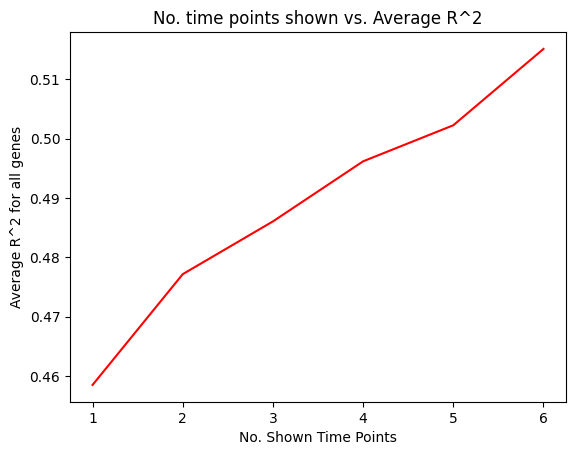

In [4]:
# plt.title(f"No. time points shown vs. Average R^2")
# plt.plot([1, 2, 3, 4, 5, 6], [avg_6, avg_5, avg_4, avg_3, avg_2, avg_1], color='red')
# plt.xlabel('No. Shown Time Points')
# plt.ylabel('Average R^2 for all genes')
# plt.show()

plt.title(f"No. time points shown vs. Average R^2")
plt.plot([1, 2, 3, 4, 5, 6], [0.4584822224408535, 0.47716075407449005, 0.4860561634272249, 0.4961879400375274, 0.5022656671604503, 0.5151403937091484], color='red')
plt.xlabel('No. Shown Time Points')
plt.ylabel('Average R^2 for all genes')
plt.show()